# SciPy - Library of scientific algorithms for Python

modified from original version by Jean-Marc Casandjian

based on:

http://dml.riken.jp/~rob/
 [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures).

http://lmfit.github.io/lmfit-py/

http://iminuit.readthedocs.org/en/latest/


## Introduction

The SciPy framework builds on top of the low-level NumPy framework for multidimensional arrays, and provides a large number of higher-level scientific algorithms. Some of the topics that SciPy covers are:

* Special functions ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integration ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimization ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Fourier Transforms ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Signal Processing ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Linear Algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Sparse Eigenvalue Problems ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Statistics ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Multi-dimensional image processing ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* File IO ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))

Each of these submodules provides a number of functions and classes that can be used to solve problems in their respective topics.

In this lecture we will look at how to use some of these subpackages.



### Prerequisite

In [1]:
import scipy


SciPy Reference Guide: http://docs.scipy.org/doc/scipy/reference/

## Integration

### Numerical integration: quadrature

Numerical evaluation of a function of the type

$\displaystyle \int_a^b f(x) dx$

is called *numerical quadrature*, or simply *quadature*. SciPy provides a series of functions for different kind of quadrature, for example the `quad`, `dblquad` and `tplquad` for single, double and triple integrals, respectively.



In [4]:
import scipy.integrate
help(scipy.integrate)

Help on package scipy.integrate in scipy:

NAME
    scipy.integrate

DESCRIPTION
    Integration and ODEs (:mod:`scipy.integrate`)
    
    .. currentmodule:: scipy.integrate
    
    Integrating functions, given function object
    
    .. autosummary::
       :toctree: generated/
    
       quad          -- General purpose integration
       dblquad       -- General purpose double integration
       tplquad       -- General purpose triple integration
       nquad         -- General purpose n-dimensional integration
       fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
       quadrature    -- Integrate with given tolerance using Gaussian quadrature
       romberg       -- Integrate func using Romberg integration
       quad_explain  -- Print information for use of quad
       newton_cotes  -- Weights and error coefficient for Newton-Cotes integration
       IntegrationWarning -- Warning on issues during integration
    
    Integrating functions, given fixed 

The `quad` function takes a large number of optional arguments, which can be used to fine-tune the behaviour of the function (try `help(quad)` for details).

The basic usage is as follows:

In [7]:
# define a simple function for the integrand
def f(x):
    return x

In [9]:

x_lower = 0 # the lower limit of x
x_upper = 1 # the upper limit of x

val, abserr = scipy.integrate.quad(f, x_lower, x_upper)

print("integral value =", val, ", absolute error =", abserr)

integral value = 0.5 , absolute error = 5.551115123125783e-15


For simple functions we can use a lambda function (name-less function) instead of explicitly defining a function for the integrand
```
lambda x: exp(-x ** 2)   
is the same as:
def f(x): return exp(-x ** 2)
```


In [10]:
import numpy
import math
# or: from math import exp,sqrt

val, abserr = scipy.integrate.quad(lambda x: math.exp(-x ** 2), -numpy.inf, numpy.inf)

print("numerical  =", val, abserr)

analytical = math.sqrt(math.pi)
print("analytical =", analytical)

numerical  = 1.7724538509055159 1.4202636780944923e-08
analytical = 1.7724538509055159


As show in the example above, we can also use 'Inf' or '-Inf' as integral limits.

Higher-dimensional integration works in the same way:

In [11]:
def integrand(x, y):
    return math.exp(-x**2-y**2)

x_lower = 0  
x_upper = 10
y_lower = 0
y_upper = 10

val, abserr = scipy.integrate.dblquad(integrand, x_lower, x_upper, lambda x : y_lower, lambda x: y_upper)

print(val, abserr)

0.7853981633974476 1.638229942140971e-13


Note how we had to pass lambda functions for the limits for the y integration, since these in general can be functions of x.

see also `scipy.integrate.nquad` for n-dimensional integrals

## Linear algebra

The linear algebra module contains a lot of matrix related functions, including linear equation solving, eigenvalue solvers, matrix functions (for example matrix-exponentiation), a number of different decompositions (SVD, LU, cholesky), etc. 

Detailed documetation is available at: http://docs.scipy.org/doc/scipy/reference/linalg.html

Here we will look at how to use some of these functions:



### Linear equation systems

Linear equation systems on the matrix form

$A x = b$

where $A$ is a matrix and $x,b$ are vectors can be solved like:

In [14]:
A = numpy.array([[1,2,3], [4,5,6], [7,8,9]])
b = numpy.array([1,2,3])

In [15]:
x = scipy.linalg.solve(A, b)

x

array([-0.23333333,  0.46666667,  0.1       ])

In [16]:
# check
scipy.dot(A, x) - b

array([  0.00000000e+00,  -2.22044605e-16,   0.00000000e+00])

We can also do the same with

$A X = B$

where $A, B, X$ are matrices:

In [17]:
A = scipy.rand(3,3)
B = scipy.rand(3,3)

In [18]:
X = scipy.linalg.solve(A, B)

In [19]:
print(X)

[[ 0.511457   -0.00975368  0.04868284]
 [-0.22481399  2.39090902  1.08348961]
 [ 0.73089928 -1.90841545 -0.8124199 ]]


In [20]:
# check
scipy.linalg.norm(scipy.dot(A, X) - B)

1.2412670766236366e-16

### Matrix operations

In [21]:
# the matrix inverse
scipy.linalg.inv(A)

array([[ 0.80990975, -1.32872135,  0.53655523],
       [ 1.20007038,  3.30568904, -1.40726583],
       [-1.72469168, -1.91383308,  1.85668182]])

In [22]:
# determinant
scipy.linalg.det(A)

0.2297799675408361

## Sparse matrices

Sparse matrices are often useful in numerical simulations dealing with large systems, if the problem can be described in matrix form where the matrices or vectors mostly contains zeros. Scipy has a good support for sparse matrices, with basic linear algebra operations (such as equation solving, eigenvalue calculations, etc).

There are many possible strategies for storing sparse matrices in an efficient way. Some of the most common are the so-called coordinate form (COO), list of list (LIL) form,  and compressed-sparse column CSC (and row, CSR). Each format has some advantanges and disadvantages. Most computational algorithms (equation solving, matrix-matrix multiplication, etc) can be efficiently implemented using CSR or CSC formats, but they are not so intuitive and not so easy to initialize. So often a sparse matrix is initially created in COO or LIL format (where we can efficiently add elements to the sparse matrix data), and then converted to CSC or CSR before used in real calcalations.

For more information about these sparse formats, see e.g. http://en.wikipedia.org/wiki/Sparse_matrix

When we create a sparse matrix we have to choose which format it should be stored in. For example, 

In [23]:
import scipy.sparse

More efficient way to create sparse matrices: create an empty matrix and populate with using matrix indexing (avoids creating a potentially large dense matrix)

In [24]:
A = scipy.sparse.lil_matrix((4,4)) # empty 4x4 sparse matrix
A[0,0] = 1
A[1,1] = 3
A[2,2] = A[2,1] = 1
A[3,3] = A[3,0] = 1
A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in LInked List format>

In [25]:
A.todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  3.,  0.,  0.],
        [ 0.,  1.,  1.,  0.],
        [ 1.,  0.,  0.,  1.]])

Converting between different sparse matrix formats:

In [26]:
(A * A).todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  9.,  0.,  0.],
        [ 0.,  4.,  1.,  0.],
        [ 2.,  0.,  0.,  1.]])

# Fit

## Fit using scipy  optimization

Optimization (finding minima or maxima of a function) is a large field in mathematics, and optimization of complicated functions or in many variables can be rather involved. Here we will only look at a few very simple cases. For a more detailed introduction to optimization with SciPy see: http://scipy-lectures.github.com/advanced/mathematical_optimization/index.html

To use the optimization module in scipy first include the `optimize` module:

In [27]:
import scipy.optimize

Let's first look at how to find the minima of a simple function of a single variable:

Principa:  create a function of the form:  $\displaystyle \frac{data-model}{error}$

Then a function that square and sun the previous function and use a scipy.optimize.minimize to minimize this sum:

In [28]:
help(scipy.optimize.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    In general, the optimization problems are of the form::
    
        minimize f(x) subject to
    
        g_i(x) >= 0,  i = 1,...,m
        h_j(x)  = 0,  j = 1,...,p
    
    where x is a vector of one or more variables.
    ``g_i(x)`` are the inequality constraints.
    ``h_j(x)`` are the equality constrains.
    
    Optionally, the lower and upper bounds for each element in x can also be specified 
    using the `bounds` argument.
    
    Parameters
    ----------
    fun : callable
        Objective function.
    x0 : ndarray
        Initial guess.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (Jacobian, Hessian).
    method : str or callable, o

or use the Least-square fitting (leastsq) function that   the fit concistes in miminizing the sum of squares of this fucntions (no need to create the sum of square).
"leastsq" is a wrapper around MINPACK's lmdif and lmder algorithms (Fortran, Levenberg-Marquardt method)

In [29]:
from numpy import arange, sin, pi, random, array
x = arange(0, 6e-2, 6e-2 / 30)
A, k, theta = 10, 1.0 / 3e-2, pi / 6
y_true = A * sin(2 * pi * k * x + theta)
y_meas = y_true + 2*random.randn(len(x))
error=2

def residuals(p, y, x, errors):
    A,k,theta = p
    return (y - A*sin(2*pi*k*x+theta))/errors
    #return (y - A*sin(2*pi*k*x+theta))


In [30]:
p0 = [8, 1 / 4e-2, pi/5]
plsq = scipy.optimize.leastsq(residuals, p0, args=(y_meas, x, error))

In [32]:
print(plsq[0])

[  9.8035491   33.62815374   0.44515812]


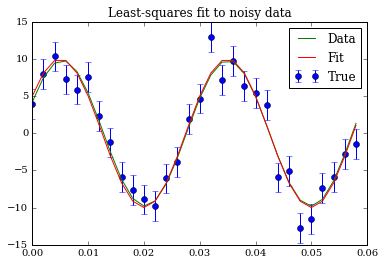

In [33]:
%matplotlib inline

import matplotlib.pyplot as plt
def peval(x, p):
    return p[0] * sin(2 * pi * p[1] * x + p[2])
plt.errorbar(x,y_meas,yerr=error,fmt='o')
plt.plot(x, peval(x, plsq[0]),x,y_true)
plt.title('Least-squares fit to noisy data')
plt.legend(['Data', 'Fit', 'True'])
plt.show()

## Fit using Minuit

Variable metric method through iminuit (no analytic gradient input in iminuit, see Minuit2 in pyROOT)

may need to run:

```sh
conda install iminuit

(conda config --add channels astropy) if that doesn't work


```

In [34]:
import iminuit

x = arange(0, 6e-2, 6e-2 / 30)
A, k, theta = 10, 1.0 / 3e-2, pi / 6
y_true = A * sin(2 * pi * k * x + theta)
y_meas = y_true + 2*random.randn(len(x))
error=2


def residual(amp,freq,pshift):
    model = amp * sin(2 * pi * freq *x  + pshift) 
    diff=(y_meas-model)/error
    return (diff**2).sum()

In [35]:
#from iminuit.util import describe
#from iminuit import Minuit

iminuit.util.describe(residual)
m = iminuit.Minuit(residual, amp=8., freq=1./2e-2, pshift=pi/5., error_amp=1., error_freq=1., error_pshift=.1)
m.set_strategy(1)
tmp=m.migrad()

/Users/kosack/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: InitialParamWarning: errordef is not given. Default to 1.


FCN = 414.84888292534924 
 TOTAL NCALL = 177 
 NCALLS = 177 
 
 
 EDM = 3.747770733191456e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,amp,1.59363,0.528173,0,0,,,
2,freq,60.7999,5.99529,0,0,,,
3,pshift,0.00318682,0.475432,0,0,,,


In [39]:
m.values

{'amp': 1.5936280950770432,
 'freq': 60.79994298429996,
 'pshift': 0.0031868175189239357}

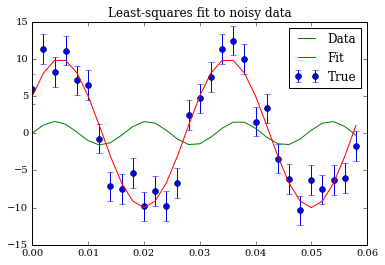

In [40]:
import matplotlib.pyplot as plt
def peval(x, p):
    return p[0] * sin(2 * pi * p[1] * x + p[2])
plt.errorbar(x,y_meas,yerr=error,fmt='o')
plt.plot(x, peval(x, list(m.values.values())),x,y_true)
plt.title('Least-squares fit to noisy data')
plt.legend(['Data', 'Fit', 'True'])
plt.show()


/Users/kosack/anaconda/lib/python3.5/site-packages/iminuit/_plotting.py:88: RuntimeWarning: Fail mncontour for amp, freq, sigma=3.033333
  warnings.warn(RuntimeWarning('Fail mncontour for %s, %s, sigma=%f' % (x, y, this_sig)))
/Users/kosack/anaconda/lib/python3.5/site-packages/iminuit/_plotting.py:88: RuntimeWarning: Fail mncontour for amp, freq, sigma=3.326667
  warnings.warn(RuntimeWarning('Fail mncontour for %s, %s, sigma=%f' % (x, y, this_sig)))
/Users/kosack/anaconda/lib/python3.5/site-packages/iminuit/_plotting.py:88: RuntimeWarning: Fail mncontour for amp, freq, sigma=3.620000
  warnings.warn(RuntimeWarning('Fail mncontour for %s, %s, sigma=%f' % (x, y, this_sig)))
/Users/kosack/anaconda/lib/python3.5/site-packages/iminuit/_plotting.py:88: RuntimeWarning: Fail mncontour for amp, freq, sigma=3.913333
  warnings.warn(RuntimeWarning('Fail mncontour for %s, %s, sigma=%f' % (x, y, this_sig)))
/Users/kosack/anaconda/lib/python3.5/site-packages/iminuit/_plotting.py:88: RuntimeWarning: 

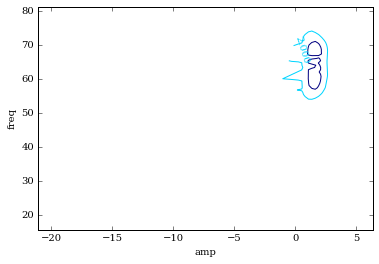

In [41]:
tmp=m.draw_mncontour('amp','freq', nsigma=4);

## Interpolation

Interpolation is simple and convenient in scipy: The `interp1d` function, when given arrays describing X and Y data, returns and object that behaves like a function that can be called for an arbitrary value of x (in the range covered by X), and it returns the corresponding interpolated y value:

In [46]:
import scipy.interpolate
import numpy as np

In [47]:
def f(x):
    return numpy.sin(x)

In [50]:
n = np.arange(0, 10)  # for data points
x = np.linspace(0, 9, 100)  # for smooth functions

y_meas = f(n) + 0.1 * np.random.randn(len(n)) # simulate measurement with noise
y_real = f(x)

linear_interpolation = scipy.interpolate.interp1d(n, y_meas)
y_interp1 = linear_interpolation(x)

cubic_interpolation = scipy.interpolate.interp1d(n, y_meas, kind='cubic')
y_interp2 = cubic_interpolation(x)

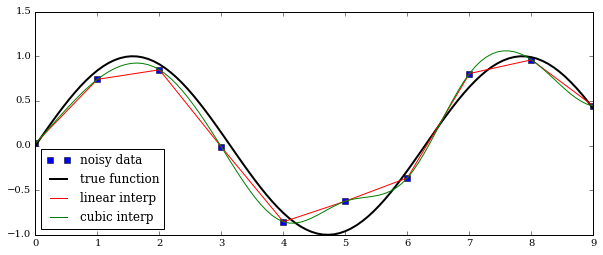

In [52]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(n, y_meas, 'bs', label='noisy data')
ax.plot(x, y_real, 'k', lw=2, label='true function')
ax.plot(x, y_interp1, 'r', label='linear interp')
ax.plot(x, y_interp2, 'g', label='cubic interp')
ax.legend(loc=3);

## Statistics

The `scipy.stats` module contains a large number of statistical distributions, statistical functions and tests. For a complete documentation of its features, see http://docs.scipy.org/doc/scipy/reference/stats.html.

There is also a very powerful python package for statistical modelling called statsmodels. See http://statsmodels.sourceforge.net for more details.

In [53]:
import scipy.stats

In [54]:
# create a (discreet) random variable with poissionian distribution

X = scipy.stats.poisson(3.5) # photon distribution for a coherent state with n=3.5 photons

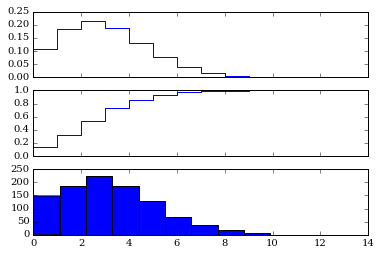

In [56]:
n = arange(0,15)

fig, axes = plt.subplots(3,1, sharex=True)

# plot the probability mass function (PMF)
axes[0].step(n, X.pmf(n))

# plot the commulative distribution function (CDF)
axes[1].step(n, X.cdf(n))

# plot histogram of 1000 random realizations of the stochastic variable X
axes[2].hist(X.rvs(size=1000));

In [57]:
# create a (continous) random variable with normal distribution
Y = scipy.stats.norm()

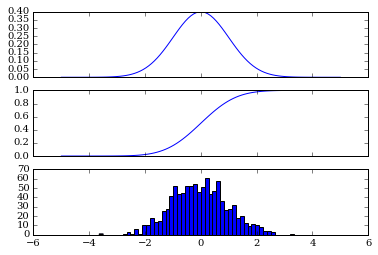

In [60]:
x = np.linspace(-5,5,100)

fig, axes = plt.subplots(3,1, sharex=True)

# plot the probability distribution function (PDF)
axes[0].plot(x, Y.pdf(x))

# plot the commulative distributin function (CDF)
axes[1].plot(x, Y.cdf(x));

# plot histogram of 1000 random realizations of the stochastic variable Y
axes[2].hist(Y.rvs(size=1000), bins=50);

Statistics:

In [61]:
X.mean(), X.std(), X.var() # poission distribution

(3.5, 1.8708286933869707, 3.5)

In [62]:
Y.mean(), Y.std(), Y.var() # normal distribution

(0.0, 1.0, 1.0)

## Signal Processing

http://docs.scipy.org/doc/scipy/reference/signal.html

`scipy.signal` has many functions for doing signal processing on N-D arrays.

* **convolutions** : `signal.convolve` and `signal.fftconvolve`, `signal.convolve2d`...
* **interpolation**: 
* **filtering /smoothing** (boxcar, hanning, hemming, gaussian, wiener)
* **wavelets**
* **peak detection**
* **spectral analysis** (Lomb-Scargle, Periodograms, etc)


In [64]:
from scipy import signal


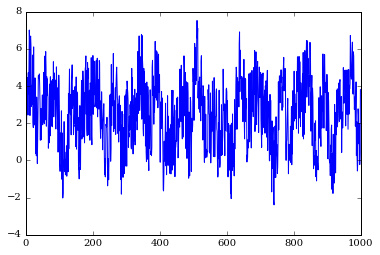

In [109]:
X = np.linspace(0,10,1000)
R = np.sin(X*15) + np.sin(X*4) + np.sin(X*10)
R += 5*np.random.uniform(size=1000)
plt.plot(R)

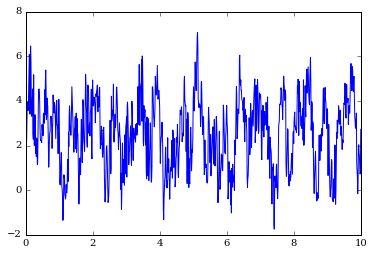

In [113]:
plt.plot(X,signal.wiener(R))

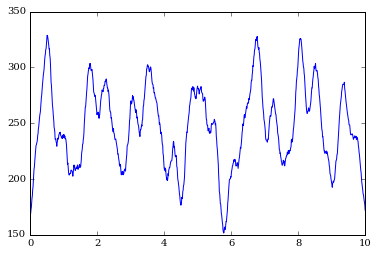

In [127]:
kernel = signal.boxcar(100)
c = signal.convolve(R, kernel, mode='same')
plt.plot(X,c)

# Exercise

- Use `scipy.stats` to make a 2D array that is a model of some astropysical source (e.g. a gaussian), where the values are the expectation values (in counts) for the source
- on one line, poisson-sample this distribution. 